# Project: Wrangling and Analyze Data

## Data Gathering

In [1]:
import pandas as pd
import numpy as np
import requests 
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

1. Reading the enhanced WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twt_arch = pd.read_csv('twitter_archive_enhanced.csv')

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
img_pred = pd.read_csv('image_predictions.tsv', sep='\t')

3. Using the tweet_json.txt to query addional data

In [4]:
list_dict_tweets = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        a = json.loads(line)
        list_dict_tweets.append(a)

extracted_vars = []

for twt in list_dict_tweets:
    tweet_id = twt['id']
    retwt_count = twt['retweet_count']
    fav_count = twt['favorite_count']
    extracted_vars.append({'tweet_id': int(tweet_id),
                           'retweet_count': int(retwt_count),
                           'favorite_count': int(fav_count)})

In [5]:
twt_vars = pd.DataFrame(extracted_vars, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data

In [6]:
# Visually assessing `twt_arch` 
twt_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# Visually assessing `img_pred`
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
# Visually assessing `twt_vars`
twt_vars

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [9]:
# Summary of `twt_arch`
twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Summary of `img_pred`
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
# Summary of `twt_vars`
twt_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [12]:
# Check for duplicate tweet id's
max(twt_arch['tweet_id'].value_counts())

1

In [13]:
# Check for rating denominators other than 10
twt_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
# Check for accuracy of rating numerators 
twt_arch['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
# Check for not null values in in_reply_to_status_id
twt_arch[twt_arch['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [16]:
# Confirming that there are only true or false values in the predictions
img_pred.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [17]:
# Confirming that there is no value after 1st August 2017.
max(twt_arch['timestamp'])

'2017-08-01 16:23:56 +0000'

In [18]:
# Checking for retweets
sum(twt_arch['retweeted_status_id'].notnull())

181

In [19]:
# Missing image urls
img_pred['jpg_url'].isnull().sum()

0

In [20]:
twt_arch['expanded_urls'].isnull().sum()

59

### Quality issues
- `twt_arch` missing values in columns in_reply_to_status_id and in_reply_to_user_id 

- Object datatype for timestamp

- Surplus observations in the `twt_arch` table when compared to the `img_pred` table; meaning some tweets dont have images

- There are retweets but only original tweets are required.

- A number of rating denominators are higher or lower than 10                             

- A number of rating numerators are higher than 15 while many others are also less than 10

- Retweet and favorite counts are floats

- A number of images are not images of dogs

### Tidiness issues
- The columns: retweet_count and favorite_count should be in the `twt_arch` table.                                    

- Two variables in timestamp

## Cleaning Data

In [21]:
# Make copies of original pieces of data
twt_arch_clean = twt_arch.copy()
img_pred_clean = img_pred.copy()
twt_vars_clean = twt_vars.copy()

### Issue #1: `twt_arch` missing values in column in_reply_to_status_id & in_reply_to_user_id.

#### Define: these columns would have been converted to a boolean data types with True or False values to simply indicate whether a tweet was a reply to a status/user id or not. However, this variables are *not* needed for analysis. Thus, they will be dropped.

#### Code

In [22]:
# Dropping the columns: in_reply_to_status_id & in_reply_to_user_id
twt_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [23]:
twt_arch_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #2: The retweet_count and favorite_count columns should be in the twt_arch table.

#### Define: Merge the retweet_count and favorite_count columns to the twt_arch table.

#### Code 

In [24]:
# Merging the dataframe twt_vars to twt_arch 
twt_arch_clean = pd.merge(twt_arch_clean, twt_vars_clean, on="tweet_id", how="left")

#### Test 

In [25]:
twt_arch_clean

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,9774.0,41048.0
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,3261.0,20562.0
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,2158.0,12041.0
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,16716.0,56848.0
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,4429.0,28226.0
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,7711.0,32467.0


### Issue #3: Two variables in timestamp in the `twt_arch` table.

#### Define: Separate the values in timestamp into two variables - date and time. After that, drop the timestamp variable.

#### Code 

In [26]:
# Two variables created from timestamp
twt_arch_clean['date'] = twt_arch_clean['timestamp'].str[:10]
twt_arch_clean['time'] = twt_arch_clean['timestamp'].str[11:]

#### Test

In [27]:
twt_arch_clean['date'].sample(5)

1241    2016-03-21
1141    2016-05-03
504     2016-12-25
37      2017-07-12
2124    2015-11-27
Name: date, dtype: object

In [28]:
twt_arch_clean['time'].sample(5)

588     01:24:14 +0000
1774    01:25:31 +0000
731     00:41:48 +0000
1223    00:43:43 +0000
1993    02:51:33 +0000
Name: time, dtype: object

### Issue #4: Object datatype for timestamp in the `twt_arch` table

#### Define: Since the timestamp variable has been split into 2 columns of date and time. They will need to be converted to datetime datatypes.

#### Code

In [29]:
# Floats to datetime conversion
twt_arch_clean['date'] = pd.to_datetime(twt_arch_clean['date'])
twt_arch_clean['time'] = pd.to_datetime(twt_arch_clean['time'])
twt_arch_clean.drop('timestamp', axis=1, inplace=True)

#### Test

In [30]:
twt_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
date                          2356 non-null datetime64[ns]
time                

### Issue #5: Surplus observations in the `twt_arch` table when compared to the `img_pred` table; meaning some tweets dont have images.

#### Define: the `twt_arch` and `img_pred` tables will need to be inner merged on the tweet ids to ensure all tweets have images

#### Code

In [31]:
# Merging the datasets
twt_clean = pd.merge(twt_arch_clean, img_pred_clean, on="tweet_id", how="inner")

#### Test:

In [32]:
twt_clean.head(3)

,tweet_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [33]:
# There should be no nulls
twt_clean.jpg_url.isnull().sum()

0

### Issue #6: There are retweets but only original tweets are required.

#### Define: Three variables (retweeted_status_id, retweeted_status_user_id  and retweeted_status_timestamp) contain retweet information. They will be used to drop all rows that were retweets. After that, the three columns will be dropped as we have no further need of them.

#### Code

In [34]:
# Dropping retweets
retweets = twt_clean[twt_clean['retweeted_status_id'].notnull()]
twt_clean = twt_clean.drop(retweets.index, axis=0)
twt_clean = twt_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [35]:
twt_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'date', 'time', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

### Issue #7: A number of denominators are higher or lower than 10

#### Define: The denominator of all real and accurate dog ratings is always 10. Hence, denominators that are not 10 will be all be dropped.

#### Code

In [36]:
# Dropping rows with wrong denominators
twt_clean.drop(twt_clean[twt_clean['rating_denominator'] != 10].index, axis=0, inplace=True)

#### Test

In [37]:
twt_clean[twt_clean['rating_denominator'] != 10]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #8: A number of numerators are higher than 15 while many others are also less than 10

#### Define: The numerators of all real and accurate dog ratings are never greater than 15 or less than 10. Hence, values not within the range will be all be dropped.

#### Code

In [38]:
# Dropping rows with wrong numerators
twt_clean.drop(twt_clean[(twt_clean['rating_numerator'] > 15) | (twt_clean['rating_numerator'] < 10)].index, axis=0, inplace=True) 

#### Test

In [39]:
twt_clean['rating_numerator'].value_counts()

12    450
10    419
11    396
13    261
14     35
Name: rating_numerator, dtype: int64

### Issue #9: 'retweet_count' and 'favorite_count' columns are floats

#### Define: These will be converted to integers because it is not possible to have 0.7 or half a retweet or 'like'.

#### Code

In [40]:
# Columns conversion to integers
twt_clean['retweet_count'] = twt_clean['retweet_count'].astype(int)
twt_clean['favorite_count'] = twt_clean['favorite_count'].astype(int)

#### Test

In [41]:
twt_clean['retweet_count'].dtype

dtype('int64')

In [42]:
twt_clean['favorite_count'].dtype

dtype('int64')

### Issue #10: A number of images are not images of dogs

#### Define: Only images of dogs are to be analyzed. However, there are non dog images such as turtles, fish, hens etc in the dataset. If the neural network that classified breeds of dogs did not classify an image as a dog in 3 predictions (p1, p2, p3), they will be dropped.

#### Code

In [43]:
# Dropping all tweets that do not contain images of dogs
not_dogs = twt_clean[(twt_clean['p1_dog'] == False) & (twt_clean['p2_dog'] == False) & (twt_clean['p3_dog'] == False)]
twt_clean.drop(not_dogs.index, axis=0, inplace=True)

#### Test

In [44]:
# Should be empty
twt_clean[(twt_clean['p1_dog'] == False) & (twt_clean['p2_dog'] == False) & (twt_clean['p3_dog'] == False)]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [45]:
twt_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 1 to 2069
Data columns (total 26 columns):
tweet_id              1391 non-null int64
source                1391 non-null object
text                  1391 non-null object
expanded_urls         1391 non-null object
rating_numerator      1391 non-null int64
rating_denominator    1391 non-null int64
name                  1391 non-null object
doggo                 1391 non-null object
floofer               1391 non-null object
pupper                1391 non-null object
puppo                 1391 non-null object
retweet_count         1391 non-null int64
favorite_count        1391 non-null int64
date                  1391 non-null datetime64[ns]
time                  1391 non-null datetime64[ns]
jpg_url               1391 non-null object
img_num               1391 non-null int64
p1                    1391 non-null object
p1_conf               1391 non-null float64
p1_dog                1391 non-null bool
p2                    13

### Issue #10: Source is from twitter

#### Define: All tweets in the dataset are from twitter, this makes the source information irrelevant.

#### Code

In [46]:
twt_clean.drop('source', axis=1, inplace=True)

#### Test

In [47]:
twt_clean.columns

Index(['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'date', 'time', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

## Storing Data
Saving the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
twt_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

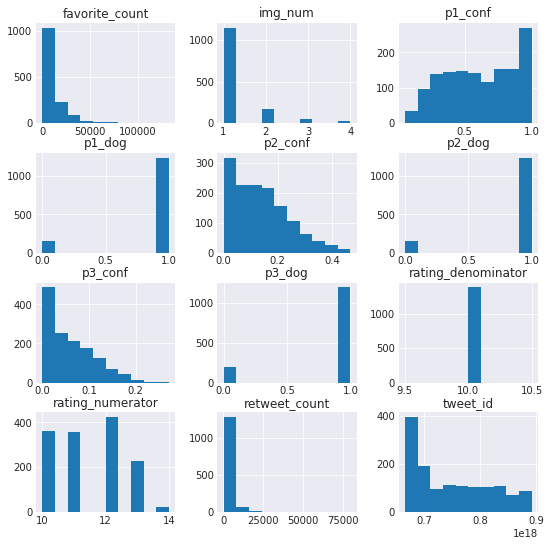

In [49]:
# General overview of the distributions in the dataset
twt_clean.hist(figsize=(9,9));

### Insights

**1. The most frequent rating is 12/10**

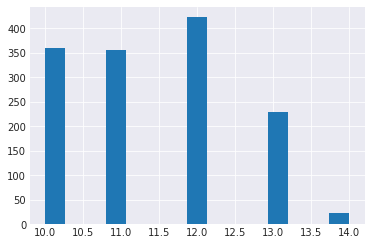

In [50]:
plt.hist(twt_clean['rating_numerator'], bins=15);

**2. There is a positive correlation between the number of retweets and likes**

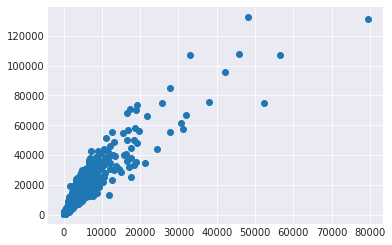

In [51]:
plt.scatter(twt_clean['retweet_count'], twt_clean['favorite_count']);

**3. The golden retriever is the most common dog in the dataset**

In [52]:
twt_clean['p1'].value_counts().nlargest(3)

golden_retriever      128
Labrador_retriever     84
Pembroke               83
Name: p1, dtype: int64